<a href="https://colab.research.google.com/github/raviteja-padala/Deep_Learning/blob/main/MNIST_dataset_ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Handwritten Digit Classification with Neural Networks: A MNIST Dataset Analysis**

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits. The MNIST database contains 60,000 training images and 10,000 testing images. The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).

About MNIST dataset : https://en.wikipedia.org/wiki/MNIST_database

# Data Loading and Visualization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load and split the MNIST dataset into training and testing sets.
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


In [ ]:
# Access the first image in the training dataset. X_train is a NumPy array containing the images.
# X_train[0] selects the first image (index 0) from the training dataset represented as an array.
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
#print corresponding y_train value at index 0
print(y_train[0])

5


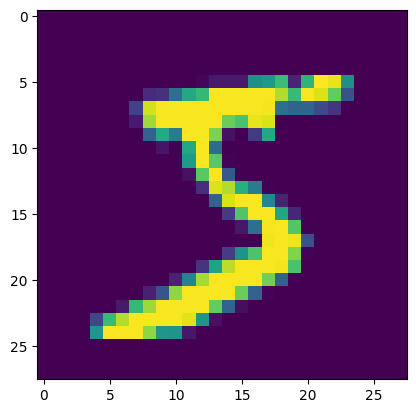

In [ ]:
# # plot image at 0 index
plt.imshow(X_train[0])

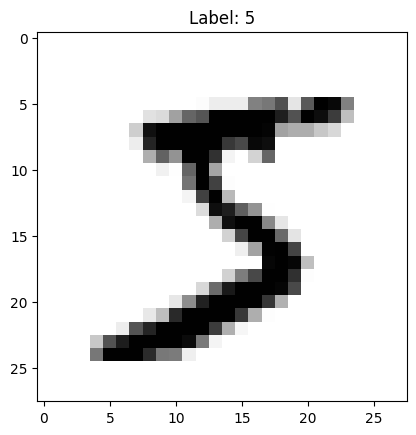

In [ ]:
# View the image at index 0 in X_train
plt.imshow(X_train[0], cmap='binary')
plt.title(f"Label: {y_train[0]}")
plt.show()

<Axes: >

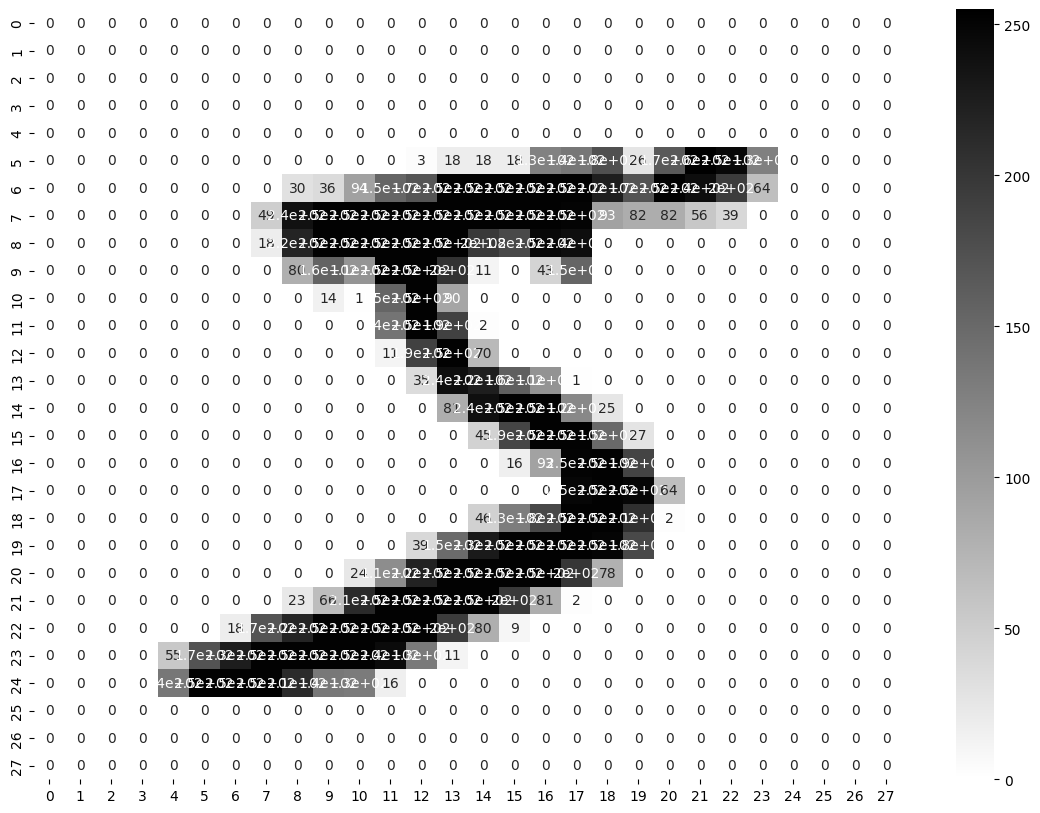

In [ ]:
# Create a heatmap plot of the first image in the training dataset (X_train[0]).
# - The `annot=True` option displays the pixel values as annotations on the heatmap.
# - The `cmap="binary"` option sets the color map to display the image in black and white. # 0 is white , 255 is black

plt.figure(figsize=(14,10))
sns.heatmap(X_train[0],annot=True,cmap="binary")

<Axes: >

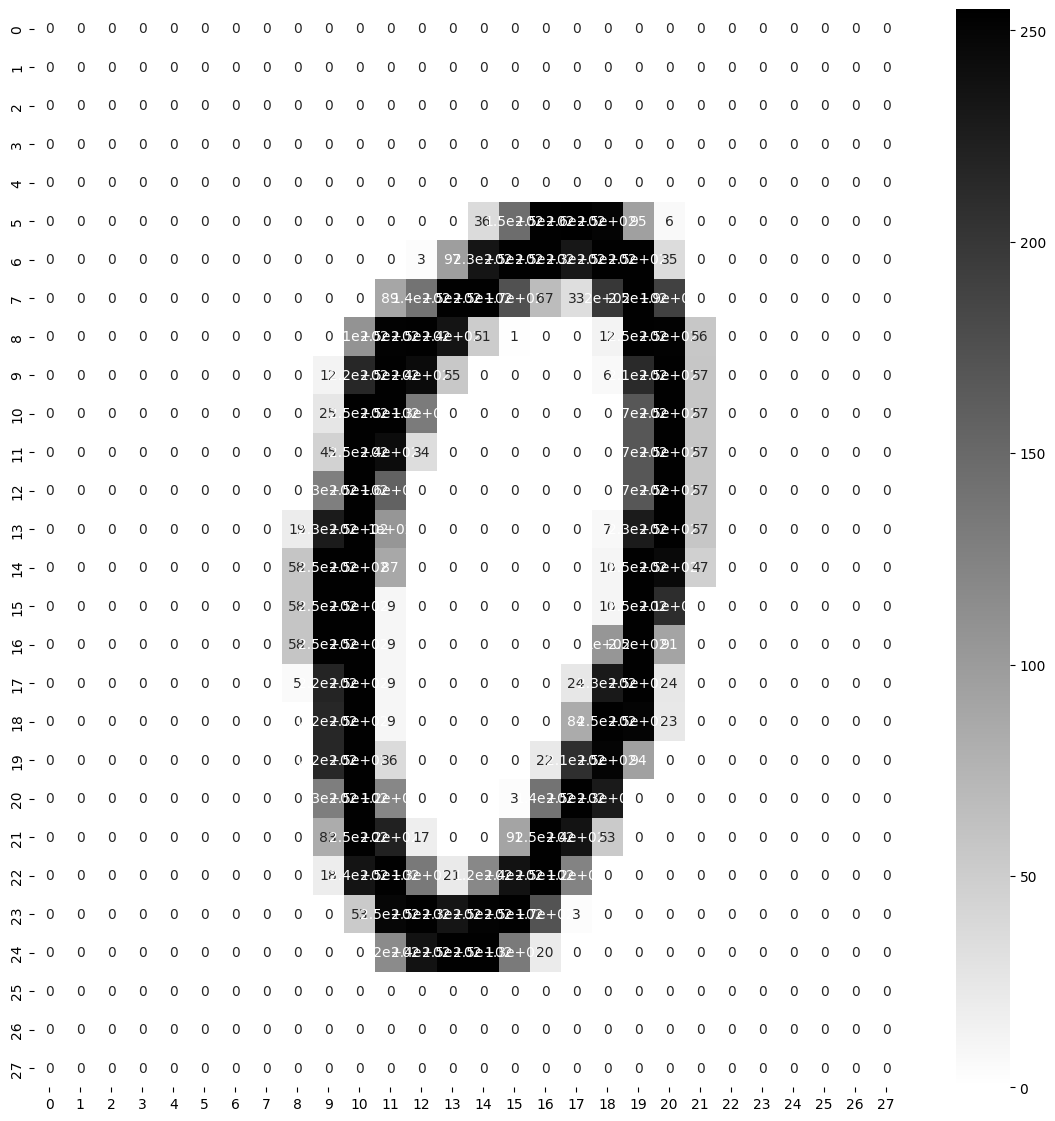

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [ ]:
# Creating a Pandas Series to visualize the labels in y_train
y_train_series = pd.Series(y_train)

# Use value_counts to count the occurrences of each class and sort them by count
value_counts = y_train_series.value_counts().sort_index()

print(value_counts)

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64


In the context of the MNIST dataset, the concept of 0 and 255 refers to the pixel intensity values used to represent grayscale images. The MNIST dataset consists of images of handwritten digits (0-9), and each image is a 28x28 pixel grayscale image. Here's what 0 and 255 mean in this context:

1. **Grayscale Images:** Grayscale images represent the brightness of each pixel in a single channel (black and white) rather than using multiple color channels (like red, green, and blue). In grayscale images, pixel intensity values typically range from 0 to 255.

2. **0 Represents Black:** In these images, a pixel with an intensity value of 0 corresponds to black. It means there is no brightness or illumination at that pixel location. In the MNIST dataset, this would represent the darkest part of the digit.

3. **255 Represents White:** A pixel with an intensity value of 255 corresponds to white. It represents the brightest part of the image. In the context of MNIST, this would correspond to the paper or canvas background on which the digits are written.

4. **Shades of Gray:** The values between 0 and 255 represent various shades of gray, with 0 being black, 255 being white, and values in between representing different levels of grayness. These intermediate values are used to depict the grayscale variations within the digit images.

So,  0 and 255 in the context of the MNIST dataset, they refer to the minimum and maximum pixel intensity values used to represent the handwritten digits in grayscale. These values are used to describe the brightness or darkness of each pixel in the images.

In [ ]:
# Print the shape of the data before normalization
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")

X_train.shape=(60000, 28, 28)
X_test.shape=(10000, 28, 28)


In [ ]:
# The following code normalizes the pixel values to be between 0 and 1.
# This can help improve the training process for many machine learning models.
# The original pixel values range from 0 to 255, so dividing by 255 scales them to the [0, 1] range.
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Print the shape of the data to verify the changes
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")

X_train.shape=(60000, 28, 28)
X_test.shape=(10000, 28, 28)


# Model Building

In [ ]:
# Create the model
model = Sequential()  # Initialize a sequential model

# Add a Flatten layer to convert 2D images to 1D vectors
# The input shape is specified as (28 * 28,) for the MNIST dataset
model.add(Flatten(input_shape=(28 , 28)))

# Add a dense (fully connected) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add another dense layer with 10 units and softmax activation for multi-class classification
# There are 10 output classes in the MNIST dataset (digits 0 to 9)
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Iterate through the layers in the model
for layer in model.layers:
    # Check if the layer is a dense layer
    if isinstance(layer, Dense):
        # Get the weights and biases for the layer
        weights, biases = layer.get_weights()

        # Print the layer name, shape of weights, and shape of biases
        print(f"Layer: {layer.name}")
        print(f"Weights Shape: {weights.shape}")
        print(f"Biases Shape: {biases.shape}")
        print(f"Weights:")
        print(weights)
        print(f"Biases:")
        print(biases)
        print()

Layer: dense_4
Weights Shape: (784, 128)
Biases Shape: (128,)
Weights:
[[-0.07783563 -0.0587643   0.02674133 ... -0.00017671 -0.01168422
  -0.02468489]
 [-0.01593921  0.04113606 -0.01960227 ...  0.07324039 -0.06540828
  -0.01122275]
 [-0.01097123  0.00376405  0.05861539 ... -0.07466777 -0.05478685
   0.06417046]
 ...
 [ 0.05621261 -0.0800478  -0.01362074 ...  0.06930619  0.06294497
   0.06595302]
 [-0.06819325  0.00990184  0.03988396 ... -0.04228045  0.05662858
  -0.0226565 ]
 [ 0.01209394 -0.07392485  0.00128621 ... -0.07395175 -0.02834709
   0.03583393]]
Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

Layer: dense_5
Weights Shape: (128, 1

The output you provided represents the initial weights and biases of two layers in your neural network model:

1. **Layer: dense**
   - **Weights Shape:** (784, 128)
     - The layer has 784 input features (as it's the first layer with an input shape of 28x28 flattened to 784) and 128 units in the hidden layer.
     - The shape of the weights matrix is (784, 128), indicating there are 784 weight parameters connecting the 784 input features to the 128 units in the hidden layer.
     - Each weight value in this matrix corresponds to the strength of the connection between an input feature and a hidden unit.
   - **Biases Shape:** (128,)
     - The layer has 128 units, so it also has 128 bias parameters (one for each unit).
     - The shape of the biases vector is (128,).
     - Biases are added to the weighted sum of inputs for each unit, allowing the network to learn translation-invariant patterns.
   - **Weights:**
     - This section shows the actual values of the weight parameters connecting the input features to the hidden layer units. The values are initialized with small random numbers.
   - **Biases:**
     - This section shows the values of the bias parameters for the hidden layer units. In this case, the biases are initialized with zeros.

2. **Layer: dense_1**
   - **Weights Shape:** (128, 10)
     - The layer receives input from the previous hidden layer with 128 units and produces output for 10 units (one for each digit class).
     - The shape of the weights matrix is (128, 10), indicating there are 128 weight parameters connecting the previous hidden layer to the 10 output units.
   - **Biases Shape:** (10,)
     - The layer has 10 units, so it also has 10 bias parameters (one for each output unit).
     - The shape of the biases vector is (10,).
   - **Weights:**
     - This section shows the actual values of the weight parameters connecting the previous hidden layer units to the output layer units. These weights determine the output probabilities for each digit class.
   - **Biases:**
     - This section shows the values of the bias parameters for the output layer units. These biases help shift the logits produced by the weights to form probabilities.

The weights and biases are initialized with small random values to break the symmetry in the neural network. During training, these values will be adjusted to minimize the loss function and improve the model's performance. The specific values of weights and biases are learned through the training process using optimization techniques like gradient descent.

# Model Training

In [ ]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2860 - accuracy: 0.9189 - val_loss: 0.1571 - val_accuracy: 0.9543
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1301 - accuracy: 0.9613 - val_loss: 0.1399 - val_accuracy: 0.9573
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0895 - accuracy: 0.9731 - val_loss: 0.1059 - val_accuracy: 0.9681
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0658 - accuracy: 0.9803 - val_loss: 0.0944 - val_accuracy: 0.9717
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0880 - val_accuracy: 0.9743
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0396 - accuracy: 0.9886 - val_loss: 0.0889 - val_accuracy: 0.9737
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.0917 - val_accuracy:

In [ ]:
# Accessing 'params' attribute in the 'history' object to retrieve model parameters
# 'params' typically includes the number of total trainable and non-trainable parameters in the model.
params = history.params

 # 'verbose': Verbosity level during training (1 for progress updates, 0 for silent, 2 for detailed)
 # 'epochs' : Number of training epochs (how many times the entire dataset is passed through the model)
 # 'steps'  : Number of training steps per epoch (usually based on the dataset size and batch size)

{'verbose': 1, 'epochs': 20, 'steps': 1500}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.285990,0.918896,0.157098,0.954333
1,0.130149,0.961333,0.139917,0.957333
2,0.089495,0.973104,0.105944,0.968083
3,0.065827,0.980250,0.094359,0.971667
4,0.050835,0.984937,0.087950,0.974250
5,0.039567,0.988625,0.088937,0.973667
6,0.031831,0.990313,0.091694,0.974500
7,0.025793,0.992104,0.094187,0.975167
8,0.019517,0.994396,0.087534,0.976833
9,0.017097,0.995083,0.099513,0.974833


# Model Evaluation

In [ ]:
# Make predictions with X_test data
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
#true_labels = np.argmax(y_test, axis=1)

# Generate a classification report
class_report = classification_report(y_test, predicted_labels)

# Print the classification report
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Sample Prediction

In [ ]:
# Example: Predict a digit from the test dataset
index = 0  # Change this to see predictions for different digits
predicted_digit = np.argmax(predictions[index])
actual_digit = y_test[index]
print(f"Predicted digit: {predicted_digit}")
print(f"Actual digit: {actual_digit}")

Predicted digit: 7
Actual digit: 7


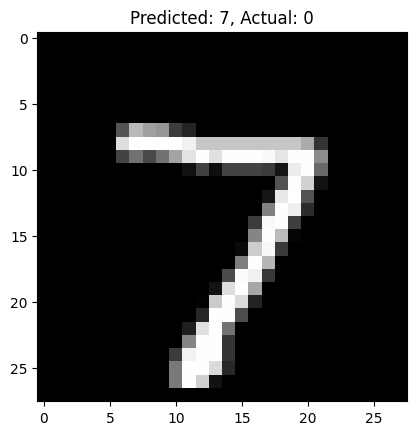

In [ ]:
# Visualize the digit image
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {actual_digit}")
plt.show()

# Visualization of model loss and accuracy

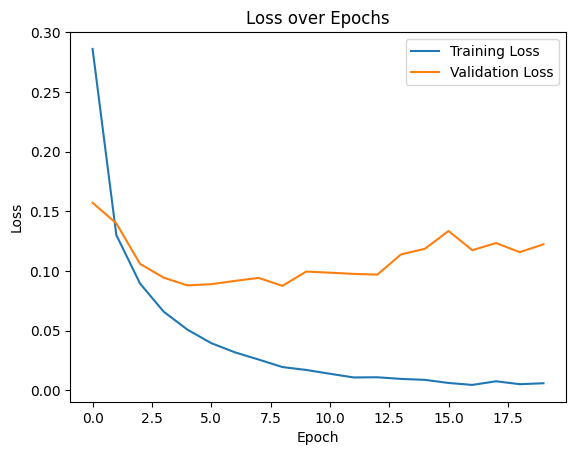

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

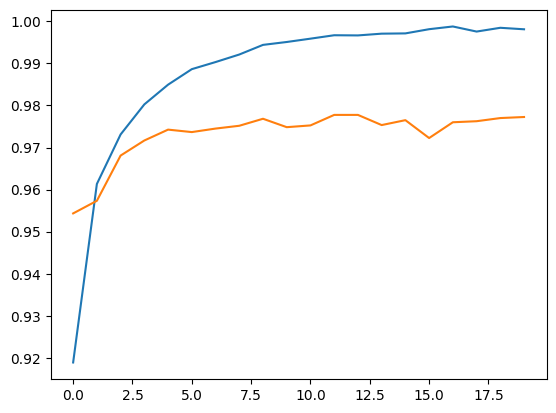

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

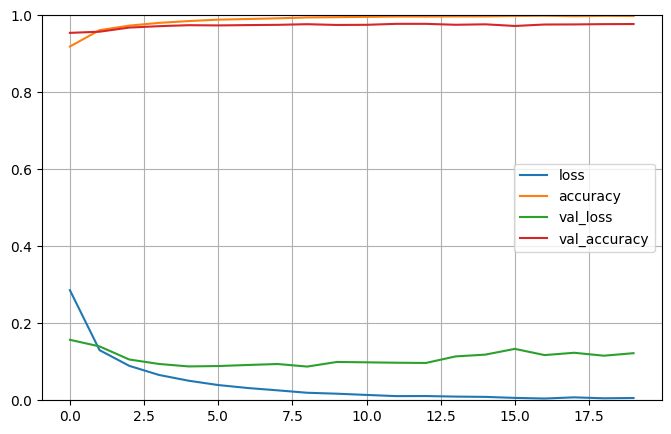

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Conclusion:

This code provides a comprehensive walkthrough of working with the MNIST dataset and building a neural network model for digit classification. The model achieves high accuracy, demonstrating its effectiveness in recognizing handwritten digits. The provided visualizations and classification reports are valuable tools for understanding model performance.